# Clustering Grocery Products

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_item = pd.read_csv('item_to_id.csv')
df_item.sample(10)

Item_name  Item_id
0              coffee       43
36  laundry detergent       18
46         baby items        4
37       dishwashing        27
15             butter        8
30             apples       32
44          hand soap       29
20            waffles        5
41      sandwich bags        7
9     spaghetti sauce       26

In [4]:
df_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
Item_name    48 non-null object
Item_id      48 non-null int64
dtypes: int64(1), object(1)
memory usage: 848.0+ bytes


In [3]:
df_purchasehist = pd.read_csv('purchase_history.csv')
df_purchasehist.sample(5)

user_id                                    id
5784    737662  37,5,45,44,2,20,21,23,24,32,46,13,39
8216   1240750        43,1,34,12,29,33,20,39,2,47,46
14644   860775                         16,8,20,40,13
20941  1109057                28,46,20,33,34,13,39,2
22053   943081                       3,34,25,5,30,32

In [5]:
df_purchasehist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39474 entries, 0 to 39473
Data columns (total 2 columns):
user_id    39474 non-null int64
id         39474 non-null object
dtypes: int64(1), object(1)
memory usage: 616.9+ KB


In [6]:
df_purchasehist.head()

user_id                                                 id
0   222087                                              27,26
1  1343649                                            6,47,17
2   404134                       18,12,23,22,27,43,38,20,35,1
3  1110200                                 9,23,2,20,26,47,37
4   224107  31,18,5,13,1,21,48,16,26,2,44,32,20,37,42,35,4...

In [7]:
print( "number of users : ", len(df_purchasehist["user_id"].unique()))
print( "total number of trasactions in purchase history : ", len(df_purchasehist["user_id"]))

number of users :  24885
total number of trasactions in purchase history :  39474


In [8]:
# Build the dictionary to store specifically item_name and item_id

item_dict = df_item.set_index('Item_id').to_dict()['Item_name']
print(item_dict.values())


dict_values(['coffee', 'tea', 'juice', 'soda', 'sandwich loaves', 'dinner rolls', 'tortillas', 'bagels', 'canned vegetables', 'spaghetti sauce', 'ketchup', 'cheeses', 'eggs', 'milk', 'yogurt', 'butter', 'cereals', 'flour', 'sugar', 'pasta', 'waffles', 'frozen vegetables', 'ice cream', 'poultry', 'beef', 'pork', 'bananas', 'berries', 'cherries', 'grapefruit', 'apples', 'broccoli', 'carrots', 'cauliflower', 'cucumbers', 'lettuce', 'laundry detergent', 'dishwashing\xa0', 'paper towels', 'toilet paper', 'aluminum foil', 'sandwich bags', 'shampoo', 'soap', 'hand soap', 'shaving cream', 'baby items', 'pet items'])


## Find the customer who bought the most items overall in her lifetime?


In [9]:
# create the counting col
df_purchasehist['items_bought']=0

In [10]:
total_items_purchased = []
for i in range(len(df_purchasehist)):
    total_items_purchased.append(len(df_purchasehist["id"].loc[i].split(",")) )

In [11]:
df_purchasehist["items_bought"]=total_items_purchased

In [12]:
df_bestcustomer = df_purchasehist[['user_id','items_bought']]
df_bestcustomer.groupby('user_id').sum()
print ("Showing top 10 of customers who bought the most number of items in recorded data")
df_bestcustomer.groupby('user_id').sum().sort_values(['items_bought'], ascending=False).head(10)

Showing top 10 of customers who bought the most number of items in recorded data


items_bought
user_id              
269335             72
367872             70
397623             64
599172             64
377284             63
1485538            62
917199             62
718218             60
653800             60
1341188            58

## Find the customer who bought that product the most for each item?

In [30]:
#creating arr of purchase items (shopping-cart) per transaction for 39474 transactions
item_arr = []
for i in range(len(df_purchasehist)):
    item_arr.append(df_purchasehist["id"].loc[i].split(",") )
#df_purchasehist["id"].apply(lambda x : x.split(','))
#df_purchasehist["id"].str.split(',')

In [31]:
final_arr = []
for i in range(len(item_arr)):
    temp_arr = item_arr[i]
    for i in range(len(temp_arr)):
        temp_arr[i]  = item_dict[int(temp_arr[i])]
    final_arr.append(temp_arr)

In [33]:
purchase_user_arr = df_purchasehist['user_id']
user_to_item =[]
for i in range(len(final_arr)):
    temp_arr = final_arr[i]
    for j in range(len(temp_arr)):
           user_to_item.append([purchase_user_arr[i], temp_arr[j]])

In [22]:
df_user_item = pd.DataFrame(user_to_item, columns=['user_id', 'item_name'])
df_user_item.head(5)

user_id        item_name
0   222087     dishwashing 
1   222087  spaghetti sauce
2  1343649          poultry
3  1343649             pork
4  1343649             beef

In [34]:
item_list = df_user_item['item_name'].unique()

In [38]:
item_fav_customer = []
for item in item_list:
    item_df = df_user_item[df_user_item["item_name"] == item]
    item_fav_customer.append([item, item_df['user_id'].value_counts().idxmax()])

In [39]:
for item in item_fav_customer:
    print (item)

['dishwashing\xa0', 956666]
['spaghetti sauce', 1341188]
['poultry', 334664]
['pork', 1374100]
['beef', 366155]
['laundry detergent', 917199]
['shampoo', 791038]
['tea', 920002]
['frozen vegetables', 1199670]
['coffee', 996380]
['juice', 255546]
['grapefruit', 1433799]
['soap', 1003550]
['sugar', 1301034]
['soda', 397623]
['lettuce', 31625]
['dinner rolls', 364868]
['pasta', 289360]
['waffles', 217277]
['bagels', 820788]
['cheeses', 884172]
['yogurt', 943163]
['milk', 837807]
['broccoli', 297185]
['apples', 1303742]
['cucumbers', 80215]
['berries', 384935]
['sandwich bags', 360336]
['hand soap', 394348]
['butter', 478446]
['cauliflower', 1198106]
['aluminum foil', 143741]
['cereals', 367872]
['cherries', 109578]
['eggs', 172120]
['ketchup', 133355]
['canned vegetables', 238495]
['carrots', 743501]
['bananas', 1218645]
['pet items', 1433188]
['shaving cream', 31625]
['sandwich loaves', 599172]
['flour', 1076958]
['tortillas', 1485538]
['toilet paper', 1425746]
['paper towels', 1077463]


# Clustering the products

In [41]:
df_user_item['bought']=1
pivot_item = df_user_item.pivot_table(index=['user_id'],columns=['item_name'],values='bought')
pivot_item.fillna(0, inplace=True)
pivot_item = pivot_item.reset_index().iloc[:,1:]
pivot_item.head(5)

item_name  aluminum foil  apples  baby items  bagels  bananas  beef  berries  \
0                    1.0     0.0         1.0     1.0      1.0   0.0      0.0   
1                    0.0     0.0         0.0     0.0      0.0   1.0      0.0   
2                    1.0     1.0         0.0     0.0      1.0   0.0      0.0   
3                    0.0     0.0         1.0     0.0      0.0   0.0      0.0   
4                    0.0     1.0         0.0     0.0      0.0   1.0      0.0   

item_name  broccoli  butter  canned vegetables   ...    shaving cream  soap  \
0               1.0     0.0                1.0   ...              0.0   0.0   
1               0.0     0.0                0.0   ...              1.0   0.0   
2               0.0     0.0                0.0   ...              0.0   0.0   
3               0.0     0.0                0.0   ...              0.0   0.0   
4               0.0     0.0                0.0   ...              0.0   1.0   

item_name  soda  spaghetti sauce  sugar  tea  toilet paper  tortillas  \
0           0.0              0.0    0.0  1.0           0.0        0.0   
1           0.0              0.0    0.0  1.0           0.0        0.0   
2           1.0              0.0    0.0  0.0           1.0        0.0   
3           0.0              0.0    0.0  0.0           0.0        0.0   
4           0.0              0.0    1.0  0.0           0.0        0.0   

item_name  waffles  yogurt  
0              0.0     0.0  
1              0.0     0.0  
2              0.0     0.0  
3              0.0     0.0  
4              0.0     0.0  

[5 rows x 48 columns]

In [42]:
pivot_item.describe()

item_name  aluminum foil        apples    baby items       bagels  \
count       24885.000000  24885.000000  24885.000000  24885.00000   
mean            0.126221      0.323930      0.125537      0.31304   
std             0.332105      0.467983      0.331334      0.46374   
min             0.000000      0.000000      0.000000      0.00000   
25%             0.000000      0.000000      0.000000      0.00000   
50%             0.000000      0.000000      0.000000      0.00000   
75%             0.000000      1.000000      0.000000      1.00000   
max             1.000000      1.000000      1.000000      1.00000   

item_name       bananas          beef       berries      broccoli  \
count      24885.000000  24885.000000  24885.000000  24885.000000   
mean           0.321238      0.310549      0.318585      0.320595   
std            0.466961      0.462728      0.465937      0.466715   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.000000      0.000000      0.000000   
50%            0.000000      0.000000      0.000000      0.000000   
75%            1.000000      1.000000      1.000000      1.000000   
max            1.000000      1.000000      1.000000      1.000000   

item_name        butter  canned vegetables      ...       shaving cream  \
count      24885.000000       24885.000000      ...        24885.000000   
mean           0.213743           0.235765      ...            0.129395   
std            0.409956           0.424484      ...            0.335644   
min            0.000000           0.000000      ...            0.000000   
25%            0.000000           0.000000      ...            0.000000   
50%            0.000000           0.000000      ...            0.000000   
75%            0.000000           0.000000      ...            0.000000   
max            1.000000           1.000000      ...            1.000000   

item_name          soap          soda  spaghetti sauce         sugar  \
count      24885.000000  24885.000000     24885.000000  24885.000000   
mean           0.126944      0.317501         0.239261      0.327346   
std            0.332917      0.465513         0.426641      0.469254   
min            0.000000      0.000000         0.000000      0.000000   
25%            0.000000      0.000000         0.000000      0.000000   
50%            0.000000      0.000000         0.000000      0.000000   
75%            0.000000      1.000000         0.000000      1.000000   
max            1.000000      1.000000         1.000000      1.000000   

item_name           tea  toilet paper     tortillas      waffles        yogurt  
count      24885.000000  24885.000000  24885.000000  24885.00000  24885.000000  
mean           0.314768      0.128592      0.314888      0.10878      0.213261  
std            0.464433      0.334754      0.464481      0.31137      0.409619  
min            0.000000      0.000000      0.000000      0.00000      0.000000  
25%            0.000000      0.000000      0.000000      0.00000      0.000000  
50%            0.000000      0.000000      0.000000      0.00000      0.000000  
75%            1.000000      0.000000      1.000000      0.00000      0.000000  
max            1.000000      1.000000      1.000000      1.00000      1.000000  

[8 rows x 48 columns]

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

correlations = pivot_item.corr()

# Using seaborn package
# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, mask=mask, cmap=cmap, vmin = -1, vmax= 1 , center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#correlations

In [44]:
correlations.sample(10)

item_name          aluminum foil    apples  baby items    bagels   bananas  \
item_name                                                                    
ice cream               0.065867  0.092506    0.063358  0.089421  0.085518   
pasta                   0.055610  0.057056    0.041471  0.061153  0.063080   
paper towels            0.120936  0.074841    0.044857  0.081303  0.066557   
laundry detergent       0.069364  0.083975    0.059563  0.086929  0.081463   
frozen vegetables       0.066778  0.093205    0.073869  0.079110  0.079523   
baby items              0.047728  0.062212    1.000000  0.071940  0.074922   
yogurt                  0.048195  0.074820    0.063001  0.087520  0.073154   
milk                    0.044327  0.082108    0.055836  0.090946  0.076725   
grapefruit              0.059703  0.231817    0.062299  0.073959  0.228918   
sandwich loaves         0.066915  0.091551    0.061917  0.239110  0.085979   

item_name              beef   berries  broccoli    butter  canned vegetables  \
item_name                                                                      
ice cream          0.094599  0.074324  0.095580  0.081363           0.082555   
pasta              0.066809  0.069943  0.065267  0.068426           0.055615   
paper towels       0.073577  0.073543  0.063221  0.061858           0.076010   
laundry detergent  0.087503  0.084694  0.084106  0.078959           0.087999   
frozen vegetables  0.093857  0.091245  0.083822  0.093380           0.081336   
baby items         0.070992  0.076462  0.063789  0.064575           0.048423   
yogurt             0.082458  0.089544  0.076643  0.178685           0.068365   
milk               0.077698  0.089737  0.066595  0.181602           0.082802   
grapefruit         0.086938  0.229641  0.083747  0.074946           0.081510   
sandwich loaves    0.086964  0.088701  0.092899  0.084023           0.088889   

item_name            ...     shaving cream      soap      soda  \
item_name            ...                                         
ice cream            ...          0.054341  0.065402  0.086393   
pasta                ...          0.031924  0.051588  0.071089   
paper towels         ...          0.057242  0.062325  0.073193   
laundry detergent    ...          0.061549  0.059624  0.084363   
frozen vegetables    ...          0.051515  0.067195  0.080120   
baby items           ...          0.050868  0.048610  0.058916   
yogurt               ...          0.052701  0.054903  0.064706   
milk                 ...          0.056962  0.063342  0.084110   
grapefruit           ...          0.057697  0.075126  0.092417   
sandwich loaves      ...          0.068104  0.065288  0.089048   

item_name          spaghetti sauce     sugar       tea  toilet paper  \
item_name                                                              
ice cream                 0.074788  0.100834  0.082932      0.068136   
pasta                     0.053433  0.095031  0.069343      0.052733   
paper towels              0.061442  0.082201  0.069337      0.135746   
laundry detergent         0.079315  0.086631  0.092285      0.057234   
frozen vegetables         0.082885  0.095856  0.071800      0.080649   
baby items                0.045073  0.118216  0.064678      0.058797   
yogurt                    0.074101  0.083790  0.075524      0.057315   
milk                      0.081299  0.097656  0.084441      0.054575   
grapefruit                0.086356  0.093208  0.085745      0.076470   
sandwich loaves           0.067674  0.099334  0.080523      0.063686   

item_name          tortillas   waffles    yogurt  
item_name                                         
ice cream           0.098730  0.059679  0.076194  
pasta               0.058561  0.108370  0.059960  
paper towels        0.072361  0.039368  0.064131  
laundry detergent   0.090058  0.059075  0.071646  
frozen vegetables   0.087882  0.055557  0.071675  
baby items          0.068229  0.053431  0.063001  
yogurt              0.084675  0.0465

In [47]:
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import squareform, pdist


distances=["euclidean", "sqeuclidean", "cityblock", "cosine", "hamming", 
           "chebyshev", "braycurtis", "correlation"]
for distance in distances:
    dist = pdist(correlations, metric=distance)
    print(distance, shc.cophenet(shc.ward(dist), dist)[0])

euclidean 0.7219567085488922
sqeuclidean 0.7568913748692128
cityblock 0.7763229914153131
cosine 0.6729597193266629
hamming nan
chebyshev 0.6359487969108698
braycurtis 0.8735531852229702
correlation 0.7534469161289101


D:\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:1280: RuntimeWarning: invalid value encountered in double_scalars
  c = numerator.sum() / np.sqrt((denomA.sum() * denomB.sum()))


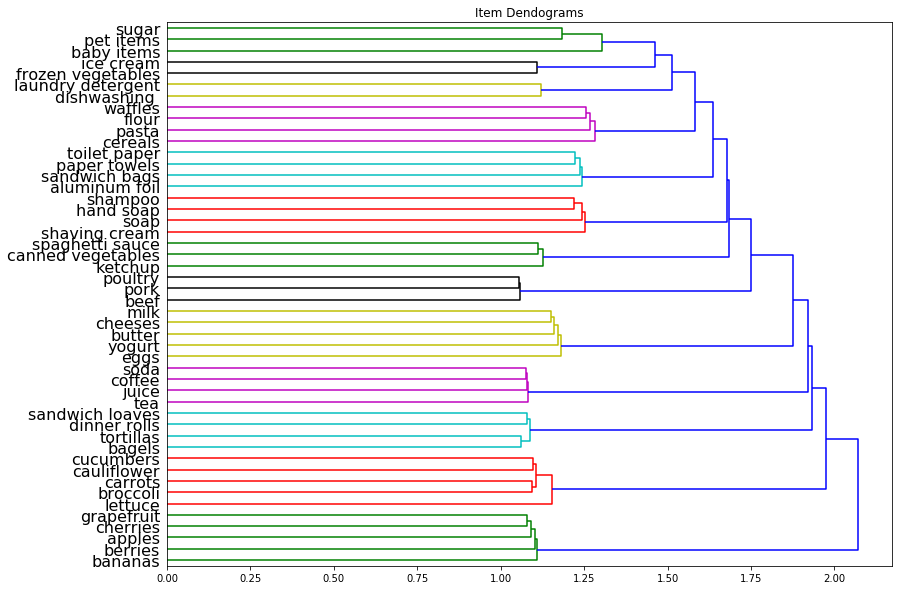

In [48]:
plt.figure(figsize=(13, 10))  
plt.title("Item Dendograms")  
col_names = list(correlations.columns.values)
dend = shc.dendrogram(
    shc.linkage(correlations, method='ward', metric="euclidean"),
    labels=col_names,
    distance_sort='ascending',
    leaf_font_size=16,
    orientation='right'
)  

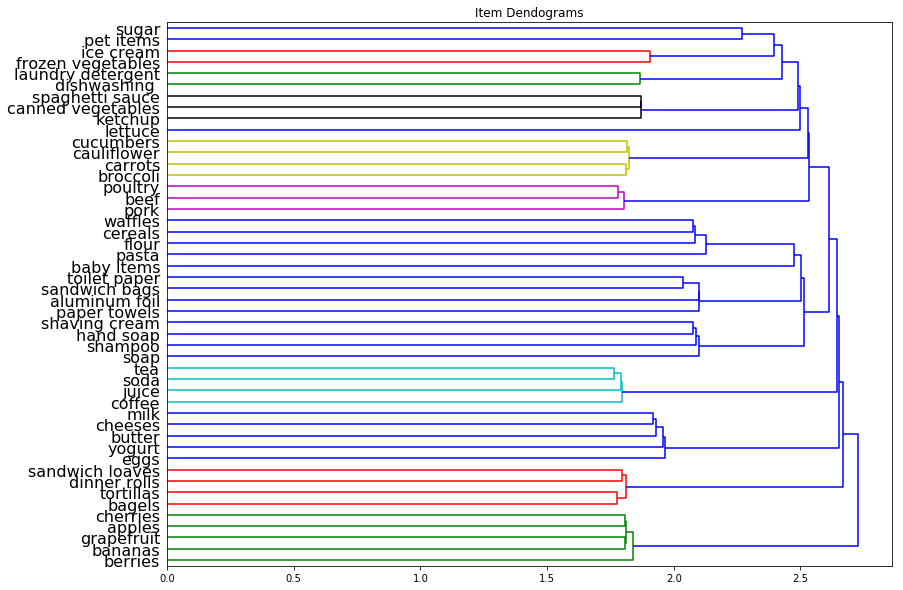

In [49]:
plt.figure(figsize=(13, 10))  
plt.title("Item Dendograms")  
col_names = list(correlations.columns.values)
dend = shc.dendrogram(
    shc.linkage(correlations, metric="cityblock"),
    labels=col_names,
    distance_sort='ascending',
    leaf_font_size=16,
    orientation='right'
)  

## Clustering test

In [50]:
correlations

item_name          aluminum foil    apples  baby items    bagels   bananas  \
item_name                                                                    
aluminum foil           1.000000  0.061678    0.047728  0.064905  0.067114   
apples                  0.061678  1.000000    0.062212  0.087139  0.225915   
baby items              0.047728  0.062212    1.000000  0.071940  0.074922   
bagels                  0.064905  0.087139    0.071940  1.000000  0.077304   
bananas                 0.067114  0.225915    0.074922  0.077304  1.000000   
beef                    0.071278  0.095325    0.070992  0.087987  0.082479   
berries                 0.055401  0.223348    0.076462  0.093777  0.219283   
broccoli                0.072599  0.087706    0.063789  0.084959  0.093150   
butter                  0.071912  0.084418    0.064575  0.092361  0.076063   
canned vegetables       0.065412  0.077379    0.048423  0.082148  0.084400   
carrots                 0.071554  0.083192    0.071563  0.089724  0.097844   
cauliflower             0.056697  0.086898    0.063182  0.082494  0.081098   
cereals                 0.040783  0.057260    0.050281  0.059343  0.054035   
cheeses                 0.063063  0.071481    0.058631  0.099572  0.076729   
cherries                0.062027  0.229901    0.061779  0.086436  0.213773   
coffee                  0.067401  0.090961    0.069483  0.084498  0.077326   
cucumbers               0.060657  0.095269    0.062489  0.093216  0.083686   
dinner rolls            0.066922  0.090346    0.068993  0.234275  0.082189   
dishwashing             0.062628  0.072018    0.048297  0.072867  0.083922   
eggs                    0.057236  0.087708    0.061107  0.081724  0.077888   
flour                   0.049472  0.064732    0.048684  0.070976  0.050934   
frozen vegetables       0.066778  0.093205    0.073869  0.079110  0.079523   
grapefruit              0.059703  0.231817    0.062299  0.073959  0.228918   
hand soap               0.050626  0.056437    0.063823  0.060587  0.057758   
ice cream               0.065867  0.092506    0.063358  0.089421  0.085518   
juice                   0.071061  0.082132    0.066904  0.090913  0.073496   
ketchup                 0.063442  0.082787    0.042254  0.087326  0.076499   
laundry detergent       0.069364  0.083975    0.059563  0.086929  0.081463   
lettuce                 0.087225  0.106786    0.097437  0.114780  0.101596   
milk                    0.044327  0.082108    0.055836  0.090946  0.076725   
paper towels            0.120936  0.074841    0.044857  0.081303  0.066557   
pasta                   0.055610  0.057056    0.041471  0.061153  0.063080   
pet items               0.057272  0.095326    0.106174  0.090284  0.083208   
pork                    0.061969  0.093887    0.084175  0.093380  0.094081   
poultry                 0.068754  0.095064    0.062992  0.089043  0.083783   
sandwich bags           0.121737  0.063323    0.047047  0.059707  0.065417   
sandwich loaves         0.066915  0.091551    0.061917  0.239110  0.085979   
shampoo                 0.038609  0.056263    0.038020  0.064655  0.041467   
shaving cream           0.045270  0.070087    0.050868  0.075134  0.069899   
soap                    0.036808  0.065698    0.048610  0.066404  0.067265   
soda                    0.071673  0.089582    0.058916  0.091899  0.092232   
spaghetti sauce         0.059981  0.079165    0.045073  0.079857  0.082774   
sugar                   0.070864  0.102892    0.118216  0.097317  0.102371   
tea                     0.062613  0.083509    0.064678  0.091047  0.091121   
toilet paper            0.133057  0.070139    0.058797  0.060387  0.072508   
tortillas               0.070844  0.086649    0.068229  0.251497  0.094638   
waffles                 0.034712  0.055191    0.053431  0.051933  0.065618   
yogurt                  0.048195  0.074820    0.063001  0.087520  0.073154   

item_name              beef   berries  broccoli    butter  canned vegetables  \
item_name          

In [51]:
from sklearn.cluster import KMeans
kmeans_sklearn = KMeans(n_clusters=10, random_state=0).fit(pivot_item)
print(kmeans_sklearn.cluster_centers_)

[[0.19225385 0.66075595 0.20531965 0.24265049 0.66168922 0.52123192
  0.67662156 0.53429771 0.26131591 0.38870742 0.5104993  0.51283248
  0.16938871 0.21231918 0.66308913 0.60569295 0.54736351 0.30797947
  0.37564162 0.23611759 0.19225385 0.31824545 0.69995334 0.19925338
  0.32897807 0.65842277 0.34624358 0.35417639 0.74241717 0.24451703
  0.1745217  0.16985534 0.44657023 0.56089594 0.51983201 0.21325245
  0.33037797 0.17078861 0.1824545  0.21045264 0.63229118 0.42557163
  0.51609893 0.61689221 0.21791881 0.31591227 0.18618759 0.23425105]
 [0.05586592 0.08446927 0.05273743 0.06368715 0.10927374 0.08134078
  0.10659218 0.09296089 0.09810056 0.11843575 0.1052514  0.11240223
  0.05162011 0.09586592 0.10189944 0.08111732 0.0996648  0.07106145
  0.11575419 0.10189944 0.04469274 0.1003352  0.10346369 0.06234637
  0.10592179 0.09385475 0.10972067 0.11083799 0.19642458 0.08916201
  0.0596648  0.04938547 0.11932961 0.08893855 0.09586592 0.06301676
  0.05698324 0.06256983 0.05698324 0.05743017 0